## Praca domowa 4
#### Autor : Daniel Tytkowski

### Zadanie 1 (1.5pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.
 
b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [1]:
import numpy as np
import pandas as pd

Importowanie ramki danych

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [18]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Podpounkt a

In [19]:
df.loc[(df.Year>2015) & (df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales),["Name"]]

,Name
4199,Mario & Sonic at the Rio 2016 Olympic Games
6477,Mario & Sonic at the Rio 2016 Olympic Games
14703,Teddy Together


Podpunkt b

In [21]:
df.loc[df.Year == 2010][["Genre", "Global_Sales"]].groupby("Genre").agg("sum").sort_values("Global_Sales", ascending=False).head(1)

,Global_Sales
Genre,
Action,117.64


Podpunkt c

In [6]:
df2 = df.groupby("Genre", as_index= False).agg(JapanMean = ("JP_Sales", "mean"), EuMean = ("EU_Sales", "mean"))
df2 = df2.loc[df2.JapanMean > df2.EuMean].sort_values("JapanMean")
df2[["Genre", "JapanMean"]].rename(columns={"Genre" : "Typ gry", "JapanMean" : "Średnia sprzedaż w Japonii"})

,Typ gry,Średnia sprzedaż w Japonii
11,Strategy,0.073284
5,Puzzle,0.099439
7,Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykres do poprawy

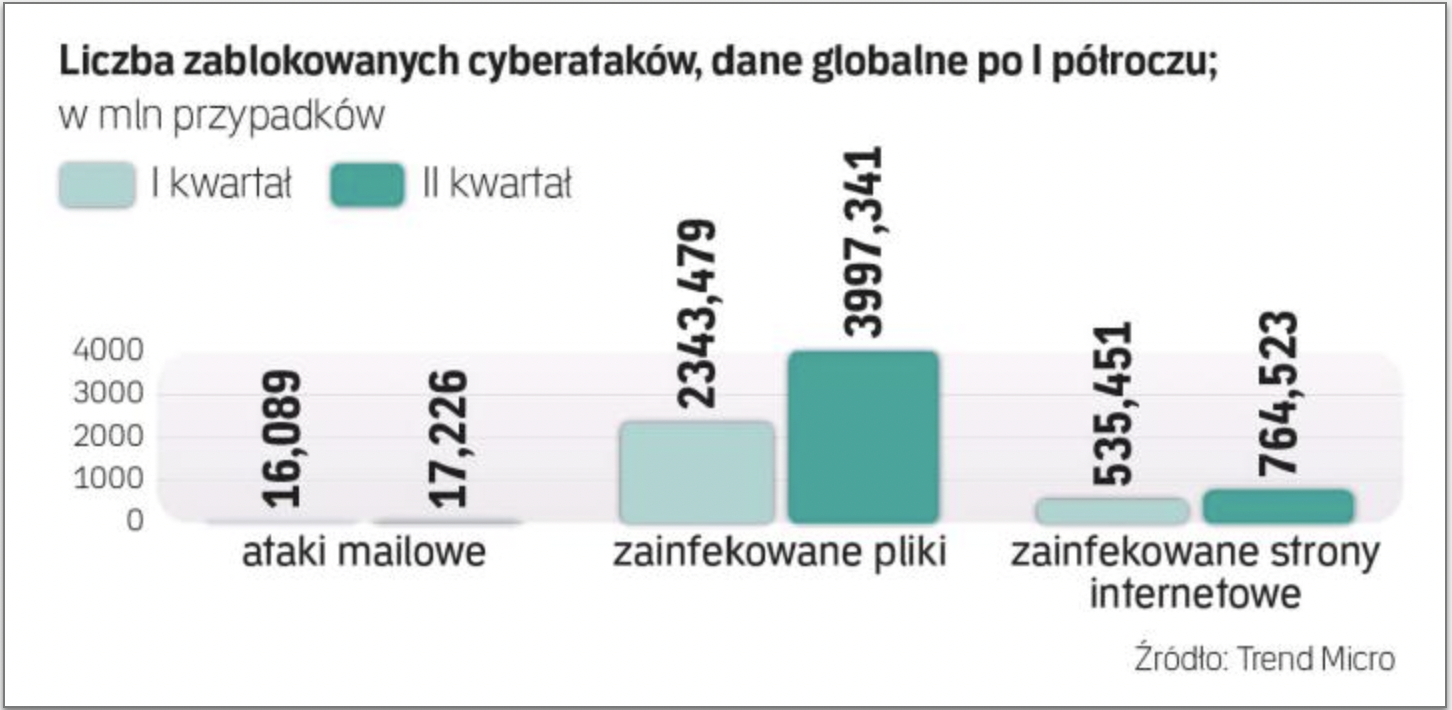

In [7]:
from IPython.display import Image
Image(filename="do_poprawy.png")
#źródło : https://www.rp.pl/gospodarka/art19070291-glowne-cele-cyberprzestepcow-na-2022-r-krolowac-bedzie-dezinformacja

Wykresy po pierwszej poprawce

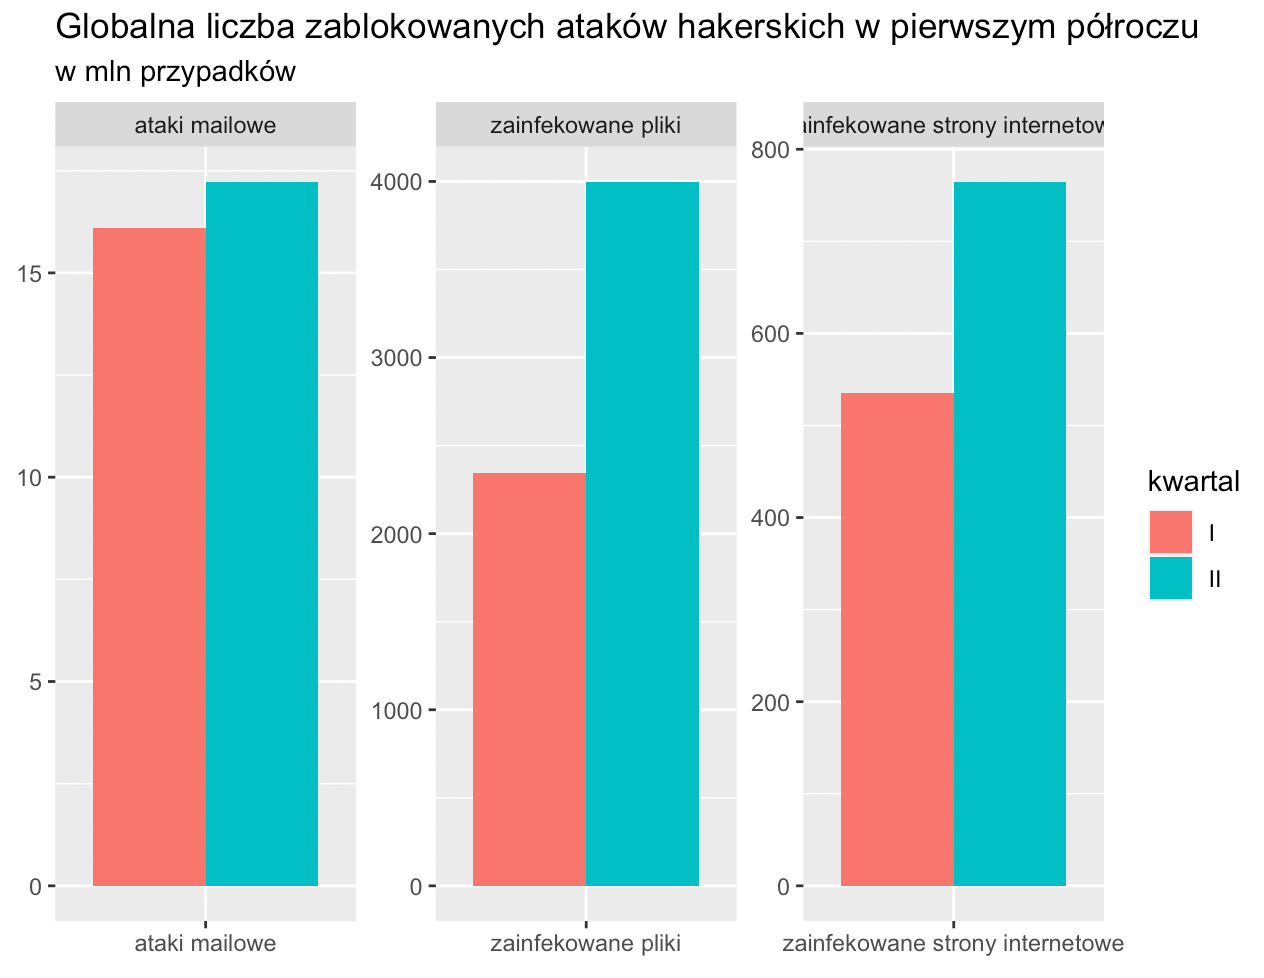

In [8]:
Image(filename="poprawiony_1.png")

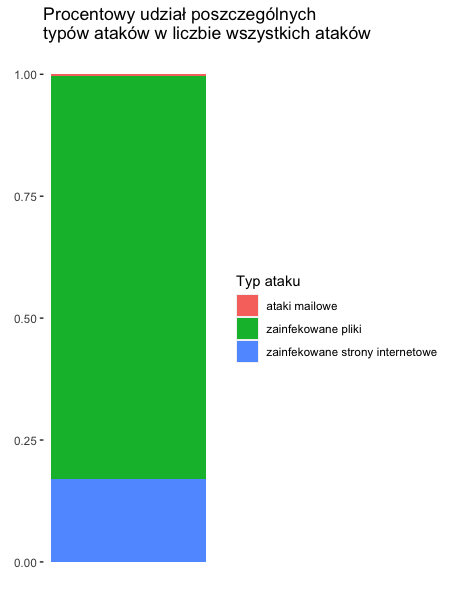

In [9]:
Image(filename="poprawiony_2.png")

#### Nowy wykres

Zacznijmy od utworzenia Data frame

In [23]:
data = {"Typ ataku" : ["zainfekowane pliki","zainfekowane pliki","zainfekowane strony internetowe","zainfekowane strony internetowe","ataki mailowe","ataki mailowe"],"Liczba" : [2343.479,3997.341,535.451,764.523,16.089,17.226], "Kwartal" : ["I","II","I","II","I","II"]}
df = pd.DataFrame(data)
df

,Typ ataku,Liczba,Kwartal
0,zainfekowane pliki,2343.479,I
1,zainfekowane pliki,3997.341,II
2,zainfekowane strony internetowe,535.451,I
3,zainfekowane strony internetowe,764.523,II
4,ataki mailowe,16.089,I
5,ataki mailowe,17.226,II


In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

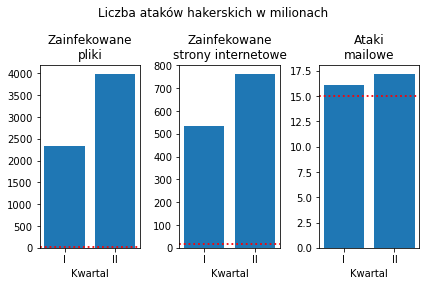

In [25]:
df1 = df.loc[df["Typ ataku"] == "zainfekowane pliki"]
df2 = df.loc[df["Typ ataku"] == "zainfekowane strony internetowe"]
df3 = df.loc[df["Typ ataku"] == "ataki mailowe"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Liczba ataków hakerskich w milionach')

ax1.bar(df1["Kwartal"], df1["Liczba"])
ax2.bar(df2["Kwartal"], df2["Liczba"])
ax3.bar(df3["Kwartal"], df3["Liczba"])
ax1.set_title('Zainfekowane\npliki')
ax2.set_title('Zainfekowane\nstrony internetowe')
ax3.set_title('Ataki\nmailowe')
ax1.set_xlabel('Kwartal')
ax2.set_xlabel('Kwartal')
ax3.set_xlabel('Kwartal')
ax1.axhline(y=15, color='red', linestyle='dotted', linewidth=1.8)
ax2.axhline(y=15, color='red', linestyle='dotted', linewidth=1.8)
ax3.axhline(y=15, color='red', linestyle='dotted', linewidth=1.8)
fig.tight_layout(pad=1.0)    
plt.show()

Wykres jest lepszy, poniewaz udało się pokazać te same informacje na jednym podzielonym wykresie. W pracy domowej 2 uznałem, ze dane tak bardzo się róznią, ze mneijsze wartości znikają przy tej samej skali. Jednocześnie zmieniając skalę dla wszsytkich 3 kategorii ataków, na pierwszy rzut oka wartości wyglądały na zblizone i trudna do wyobrazenia była róznica między nimi. Ten problem próbowałem rozwiązać dodając dodatkowy wykres.
Tym razem wzorowałem się na przykładzie z wykładu i na kazdym z wykresów narysowałem linię oznaczjącą tę samą wartość.